In [1]:
import numpy as np

from Windowing import *
from Plotting import Compare, PlotHeatmap, HeatmapBoxPlot

# 0. Introduction

In this notebook we will generate the plots used to show how well the methods perform in the binary context

# 1. Load the data

In [2]:
win = Windowing(aggCurves)
win.set_points([16,   23,   32,   45,   64,   91,  128,  181,  256,  362,  512,
        724, 1024, 1448, 2048, 2896, 4096])

win.MDS()
win.MDS_low_budget_binary()
win.MMF()
win.Last()

,Count
size_train,
16,245
23,246
32,246
40,1
45,244
...,...
1048576,2
1482910,1
1486391,1


# 2. Method

We want to compare how good each is in the binary context. To do this we will take the average difference in absolute error.
Here the error will be 1 if the prediction is wrong and 0 if it is correct (as to which learner wins in the binary problem).

In [5]:
win.help()

This class is used to analyse the results of different learning curve regression methods.
The results are stored in a dictionary called 'results'. To access them use the following syntax: self.results['method']['test error'][datasetID, learnerID, windowID, targetID]
To plot the results of a specific method, use the following functions: 

PlotCurveAndPrediction: plots the predictions and true values for a specific dataset, learner, window and target. This gives a zoomed in view of what is happening.

Boxplots: Given a specific slice of the dataset, learner, window and target, this function makes the corresponding boxplots. You can specify what you want to plot the boxplots over, by setting the xaxis parameter to 'dataset', 'learner', 'window' or 'target'.



In [14]:
win.results['Last']['regression']

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan])

In [34]:
# We make function so that it is easier to do for multiple different windows/targets
# This function will perform the binary comparison for the given data
def Binary(data):
    # Which learner would win in the binary problem
    predictions = (data[:,:,None] > data[:,None]).astype(float)

    # keep nans
    nans = np.isnan(data[:,:,None]) + np.isnan(data[:,None])
    predictions[nans] = np.nan

    # Make ties 0.5
    predictions[data[:,:,None] == data[:,None]] = 0.5

    # Don't compete against same learner
    np.einsum('ijj...->ij...', predictions)[...] = np.nan

    return predictions

# 3. Plotting
We implement the singular plots and the comparison plots again

In [157]:
# We get the binary predictions
MDSbinary = win.results['MDS']['binary']
MDSregression = Binary(win.results['MDS']['regression'])
MMF = Binary(win.results['MMF']['regression'])
Last = Binary(win.results['Last']['regression'])
actual = Binary(win.target)

In [114]:
win.results['MMF']['regression'][0,:,4,-1]

array([1.0371635 , 1.0649858 , 1.002626  , 0.750505  , 1.0786738 ,
       1.0180404 , 1.096784  , 1.0206057 , 1.0383836 , 1.0062457 ,
       0.96781987, 1.0287677 , 0.89512634, 0.89231104, 0.84383374,
       1.0070566 , 1.0467701 , 0.98232913, 0.5001221 , 0.5001221 ],
      dtype=float32)

C:\Users\lkiel\PycharmProjects\AMLthesis\HelperFiles\Plotting.py:88: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


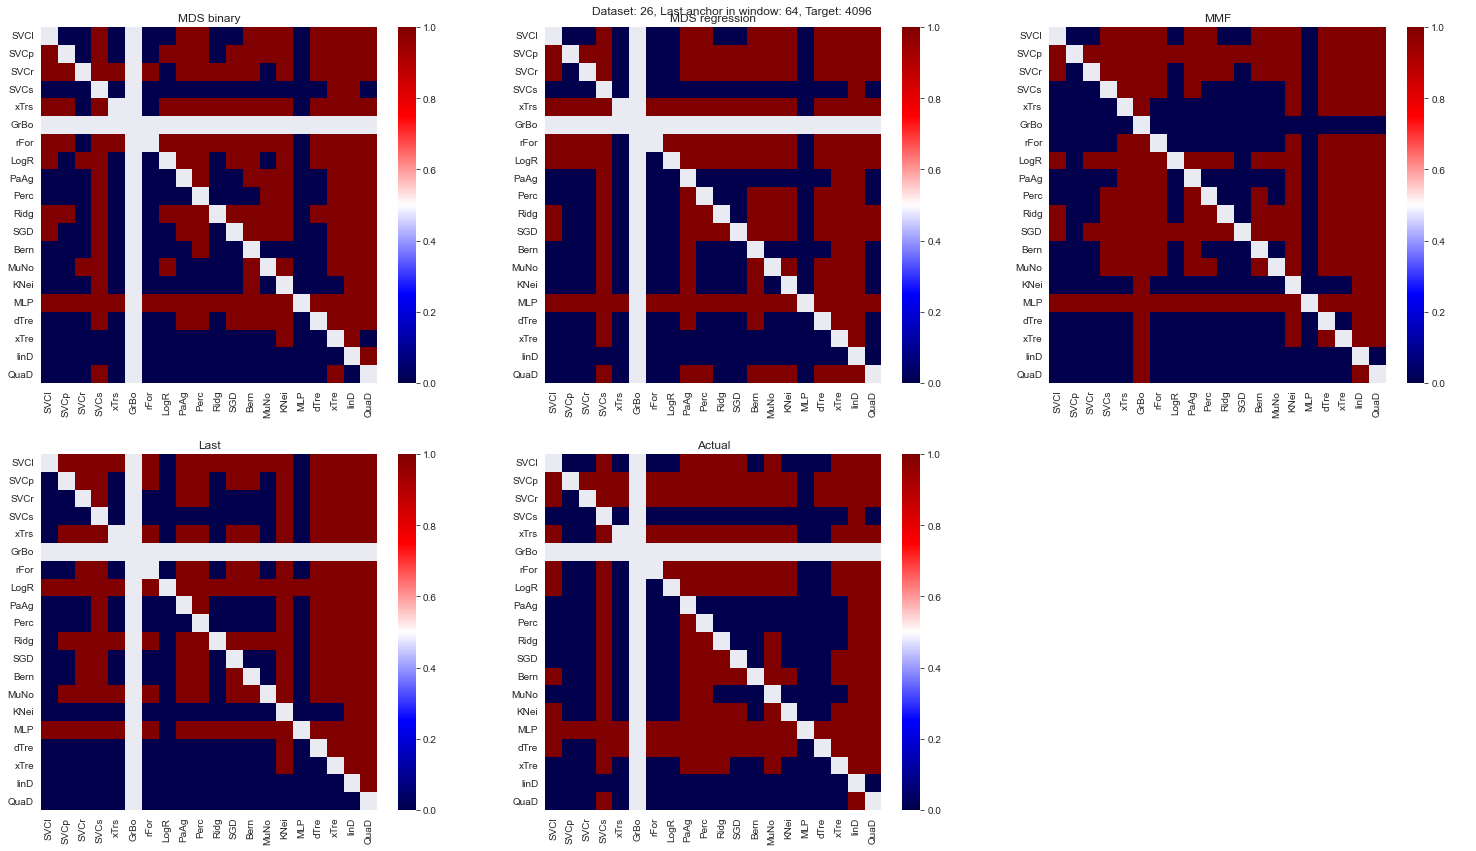

In [116]:
# For the singular we need to choose a dataset, window and target
DS = 12
Win = 4
Target = -1


title = ('Dataset: {}, Last anchor in window: {}, Target: {}'.format(win.datasets[DS],
                                                                                  win.train_anchors[Win],win.target_anchors[Target]))

MDSbin_plot = MDSbinary[DS,:,:,Win,Target]
MDSreg_plot = MDSregression[DS,:,:,Win,Target]
MMF_plot = MMF[DS,:,:,Win,Target,]
Last_plot = Last[DS,:,:,Win,Target]
actual_plot = actual[DS,:,:,Target]

plots = {'MDS binary':MDSbin_plot, 'MDS regression':MDSreg_plot, 'MMF':MMF_plot, 'Last':Last_plot, 'Actual':actual_plot}

PlotHeatmap(plots, label=True, title = title)

C:\Users\lkiel\AppData\Local\Temp\ipykernel_6908\2748910089.py:15: RuntimeWarning: Mean of empty slice
  plots = {labels[i]: (np.nanmean(np.abs(d[i][0] - truth_reference) -
C:\Users\lkiel\PycharmProjects\AMLthesis\HelperFiles\Plotting.py:116: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


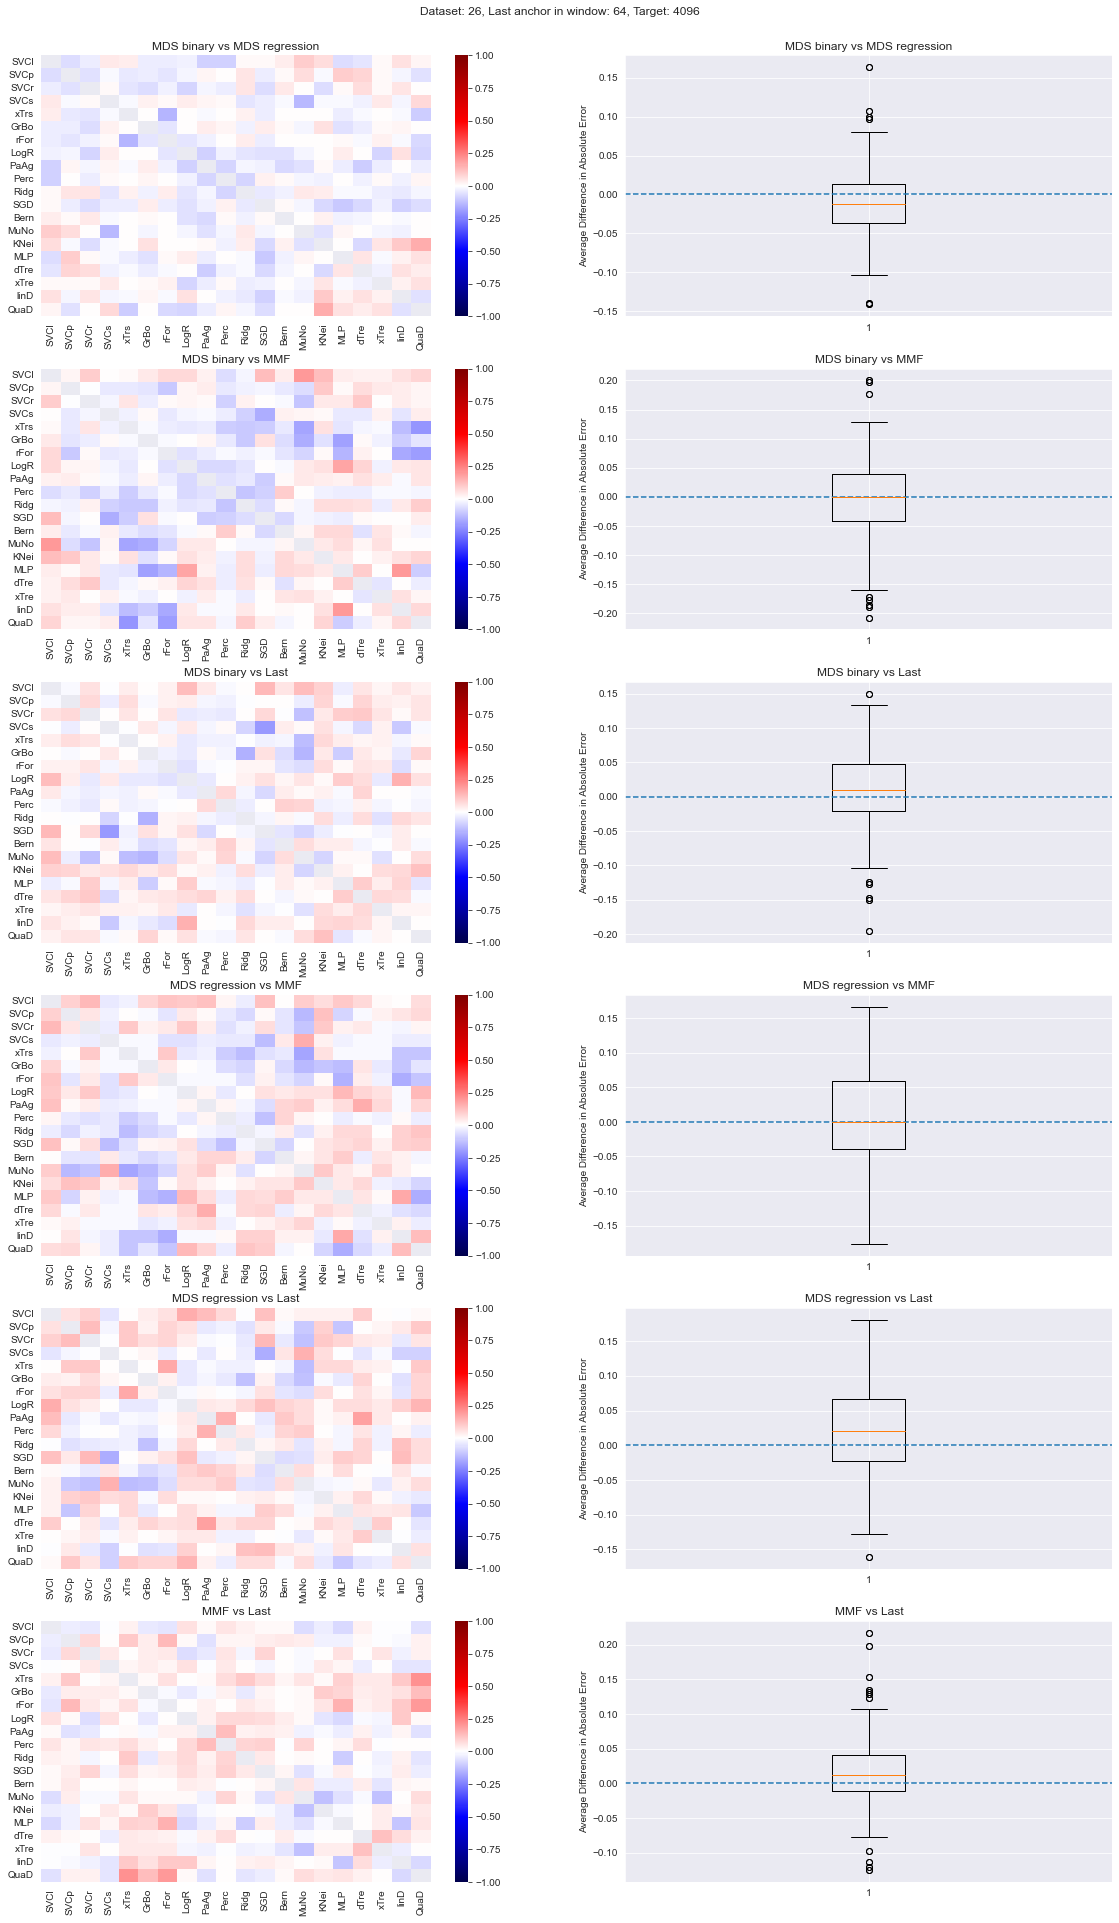

In [130]:
# For the comparison we need to choose a window and target
Win = 8
Target = -1

MDSbin_plot = MDSbinary[:,:,:,Win,Target]
MDSreg_plot = MDSregression[:,:,:,Win,Target]
MMF_plot = MMF[:,:,:,Win,Target]
Last_plot = Last[:,:,:,Win,Target]
actual_plot = actual[:,:,:,Target]


plots = {'MDS binary vs MDS regression': [MDSbin_plot, MDSreg_plot], 'MDS binary vs MMF': [MDSbin_plot, MMF_plot],
         'MDS binary vs Last': [MDSbin_plot, Last_plot],
         'MDS regression vs MMF': [MDSreg_plot, MMF_plot], 'MDS regression vs Last': [MDSreg_plot, Last_plot],'MMF vs Last': [MMF_plot, Last_plot]}

Compare(plots, actual_plot, label=True, title = title)

# 4. Boxplots
We will take 'MDS' as MDS binary as it performs better, we will do comparison between MDS, MMF and Last over windows at specific targets

In [161]:
# Broadcast actual
actual = Binary(win.target)[...,None,:]

# Get errors
MDS_error = np.nanmean(np.abs(MDSbinary- actual),axis=0)
MMF_error = np.nanmean(np.abs(MMF - actual), axis=0)
Last_error = np.nanmean(np.abs(Last - actual), axis=0)


C:\Users\lkiel\AppData\Local\Temp\ipykernel_6908\2224368370.py:5: RuntimeWarning: Mean of empty slice
  MDS_error = np.nanmean(np.abs(MDSbinary- actual),axis=0)
C:\Users\lkiel\AppData\Local\Temp\ipykernel_6908\2224368370.py:6: RuntimeWarning: Mean of empty slice
  MMF_error = np.nanmean(np.abs(MMF - actual), axis=0)
C:\Users\lkiel\AppData\Local\Temp\ipykernel_6908\2224368370.py:7: RuntimeWarning: Mean of empty slice
  Last_error = np.nanmean(np.abs(Last - actual), axis=0)


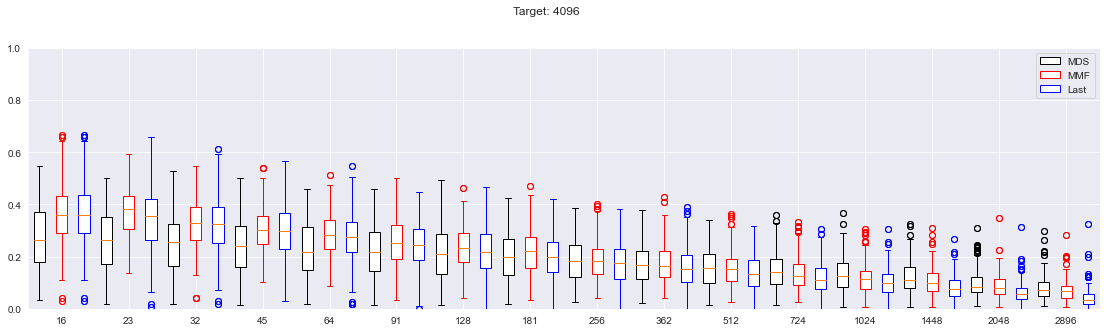

In [165]:
# We only need to choose a target
Target = -1

plots = {}
ind = range(len(win.train_anchors))
plots['MDS'] = {str(win.train_anchors[i]): MDS_error[...,i, Target] for i in ind}
plots['MMF'] = {str(win.train_anchors[i]): MMF_error[...,i, Target] for i in ind}
plots['Last'] = {str(win.train_anchors[i]): Last_error[...,i, Target] for i in ind}

Boxplots(plots, title = 'Target: {}'.format(win.target_anchors[Target]), ylim = (0,1), figsize=(3, 1))

C:\Users\lkiel\AppData\Local\Temp\ipykernel_6908\2093376437.py:3: RuntimeWarning: Mean of empty slice
  MDSvsMMF = np.nanmean(np.abs(MDSbinary - actual) - np.abs(MMF - actual), axis=0)
C:\Users\lkiel\AppData\Local\Temp\ipykernel_6908\2093376437.py:4: RuntimeWarning: Mean of empty slice
  MMFvsLast = np.nanmean(np.abs(MMF - actual) - np.abs(Last - actual), axis=0)
C:\Users\lkiel\AppData\Local\Temp\ipykernel_6908\2093376437.py:5: RuntimeWarning: Mean of empty slice
  MDSvsLast = np.nanmean(np.abs(MDSbinary - actual) - np.abs(Last - actual), axis=0)


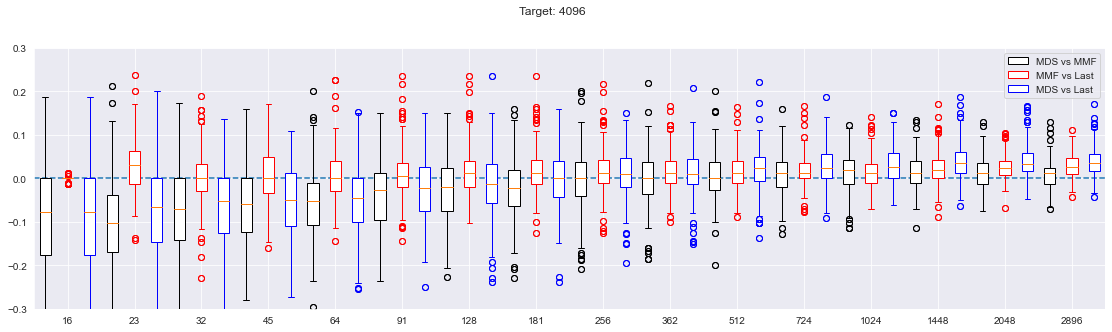

In [170]:
# Now for MDS vs MMF and MMF vs Last
# We take the mean at then end, so it says how many more times was MDS better than MMF
MDSvsMMF = np.nanmean(np.abs(MDSbinary - actual) - np.abs(MMF - actual), axis=0)
MMFvsLast = np.nanmean(np.abs(MMF - actual) - np.abs(Last - actual), axis=0)
MDSvsLast = np.nanmean(np.abs(MDSbinary - actual) - np.abs(Last - actual), axis=0)


plots = {}
ind = range(len(win.train_anchors))
plots['MDS vs MMF'] = {str(win.train_anchors[i]): MDSvsMMF[...,i, Target] for i in ind}
plots['MMF vs Last'] = {str(win.train_anchors[i]): MMFvsLast[...,i, Target] for i in ind}
plots['MDS vs Last'] = {str(win.train_anchors[i]): MDSvsLast[...,i, Target] for i in ind}

Boxplots(plots, title = 'Target: {}'.format(win.target_anchors[Target]), ylim = (-0.3,0.3), figsize=(3, 1), hline = 0)

# 5. Heatmaps
Lets also do the heatmaps for completeness

In [171]:
# Averages for heatmap
averagesMDSvsMMF = np.nanmean(MDSvsMMF, axis=(0,1))
averagesMMFvsLast = np.nanmean(MMFvsLast, axis=(0,1))
averagesMDSvsLast = np.nanmean(MDSvsLast, axis=(0,1))

C:\Users\lkiel\AppData\Local\Temp\ipykernel_6908\3092170231.py:2: RuntimeWarning: Mean of empty slice
  averagesMDSvsMMF = np.nanmean(MDSvsMMF, axis=(0,1))
C:\Users\lkiel\AppData\Local\Temp\ipykernel_6908\3092170231.py:3: RuntimeWarning: Mean of empty slice
  averagesMMFvsLast = np.nanmean(MMFvsLast, axis=(0,1))
C:\Users\lkiel\AppData\Local\Temp\ipykernel_6908\3092170231.py:4: RuntimeWarning: Mean of empty slice
  averagesMDSvsLast = np.nanmean(MDSvsLast, axis=(0,1))


C:\Users\lkiel\AppData\Local\Temp\ipykernel_6908\907763985.py:28: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(ax[0].imshow(averagesMDSvsMMF, cmap = 'seismic', vmin = -0.1, vmax = 0.1), cax=cbar_ax, label = 'Mean absolute error')


Text(0.5, 0.98, 'Average error for each comparison, blue means left wins, red means right wins')

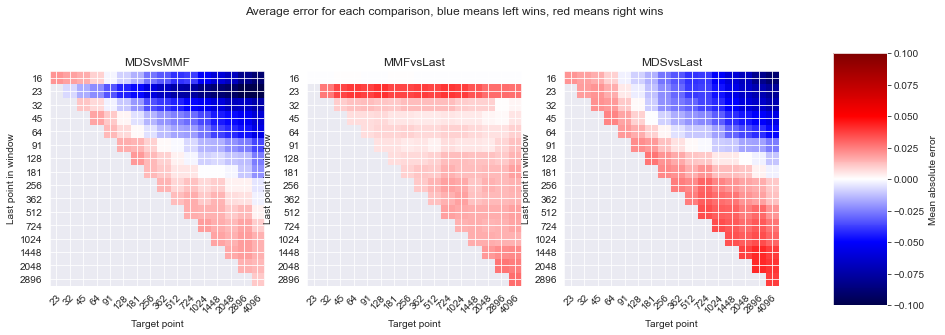

In [175]:
# plot the heatmaps for each side by side
fig, ax = plt.subplots(1,3, figsize = (15,5))

ax[0].imshow(averagesMDSvsMMF, cmap = 'seismic', vmin = -0.1, vmax = 0.1)
ax[1].imshow(averagesMMFvsLast, cmap = 'seismic', vmin = -0.1, vmax = 0.1)
ax[2].imshow(averagesMDSvsLast, cmap = 'seismic', vmin = -0.1, vmax = 0.1)

ax[0].set_title('MDSvsMMF')
ax[1].set_title('MMFvsLast')
ax[2].set_title('MDSvsLast')

# set (tick) labels
for i in range(3):
        ax[i].set_xticks(np.arange(len(win.target_anchors)))
        ax[i].set_yticks(np.arange(len(win.train_anchors)))
        ax[i].set_xticklabels(win.target_anchors)
        ax[i].set_yticklabels(win.train_anchors)
        ax[i].set_xlabel('Target point')
        ax[i].set_ylabel('Last point in window')

        # Rotate the tick labels and set their alignment.
        plt.setp(ax[i].get_xticklabels(), rotation=45, ha="right",
                 rotation_mode="anchor")

# set colorbar for all subplots the same
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(ax[0].imshow(averagesMDSvsMMF, cmap = 'seismic', vmin = -0.1, vmax = 0.1), cax=cbar_ax, label = 'Mean absolute error')

# set title
fig.suptitle('Average error for each comparison, blue means left wins, red means right wins')